In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
def read_file(input_loc):
    with open(input_loc) as file:
        listo = [line.rstrip('\n') for line in file]
    
    return listo

In [9]:
examp1 = read_file('input/input_13ex.txt')

In [12]:
examp1

['6,10',
 '0,14',
 '9,10',
 '0,3',
 '10,4',
 '4,11',
 '6,0',
 '6,12',
 '4,1',
 '0,13',
 '10,12',
 '3,4',
 '3,0',
 '8,4',
 '1,10',
 '2,14',
 '8,10',
 '9,0',
 '',
 'fold along y=7',
 'fold along x=5']

In [22]:
examp1[18:]

['', 'fold along y=7', 'fold along x=5']

In [156]:
def generate_array(inp):
    csplit = inp.index('')
    raw_coords = inp[:csplit]
    
    folds = inp[csplit+1:]
    foldsr = [f.split(' ')[2] for f in folds]
    foldpr = [(f[0], int(f[2:])) for f in foldsr]
    
    coords_str = [line.split(',') for line in raw_coords]
    coords = [(int(col), int(row)) for col, row in coords_str]
    
    width = max([col for col, row in coords]) + 1
    height = max([row for col, row in coords]) + 1
    
    if width % 2 == 0:
        width += 1
    
    print(width, height)
    
    canvas = np.zeros((height, width))
    
    return coords, foldpr, canvas

In [83]:
def draw_points(coords, canvas):
    for col, row in coords:
        canvas[row, col] = 1
        
    return canvas

In [84]:
coords, folds, canvas = generate_array(examp1)

In [47]:
folds

['fold along y=7', 'fold along x=5']

In [85]:
draw_points(coords, canvas)

array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

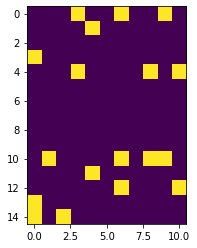

In [51]:
plt.imshow(canvas)

In [ ]:
# fold 

In [93]:
canvasc = canvas.copy()

In [126]:
def folding(fold, canvas):
    orient, line = fold
    
    if orient == 'y':
        top = canvas[:line]
        bottom = canvas[line+1:]
        
        bottom_flipped = np.flipud(bottom)
        
        merged = top + bottom_flipped
    
        return merged
    
    if orient == 'x':
        left = canvas[:, :line]
        right = canvas[:, line+1:]
        
        print(left.shape, right.shape)
        
        flipped_right = np.fliplr(right)
        
        merged = left + flipped_right
        
        return merged

In [94]:
fold1 = folding(folds[0], canvasc)

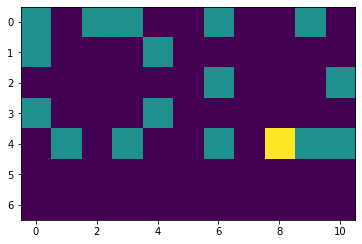

In [96]:
plt.imshow(fold1)

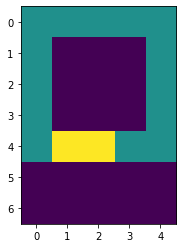

In [105]:
plt.imshow(folding(folds[1], fold1))

## part 1 on REAL thing

In [107]:
rsample = read_file('input/input_13.txt')

In [157]:
coords, folds, canvas = generate_array(rsample)

1311 895


In [158]:
draw_points(coords, canvas)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

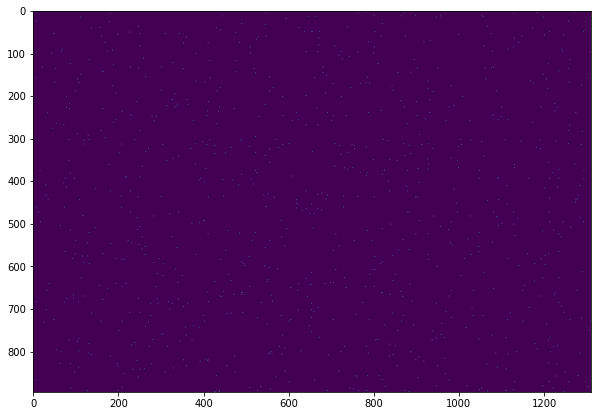

In [170]:
plt.figure(figsize=(10, 10))
plt.imshow(canvas)

In [175]:
canvasc = canvas.copy()

for fold in folds:
    print(fold)
    canvasc = folding(fold, canvasc)

('x', 655)
(895, 655) (895, 655)
('y', 447)
('x', 327)
(447, 327) (447, 327)
('y', 223)
('x', 163)
(223, 163) (223, 163)
('y', 111)
('x', 81)
(111, 81) (111, 81)
('y', 55)
('x', 40)
(55, 40) (55, 40)
('y', 27)
('y', 13)
('y', 6)


In [176]:
np.where(canvasc > 0)[0].shape

(102,)

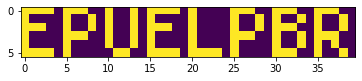

In [178]:
plt.imshow(canvasc > 0)

In [ ]:
# 102 too low